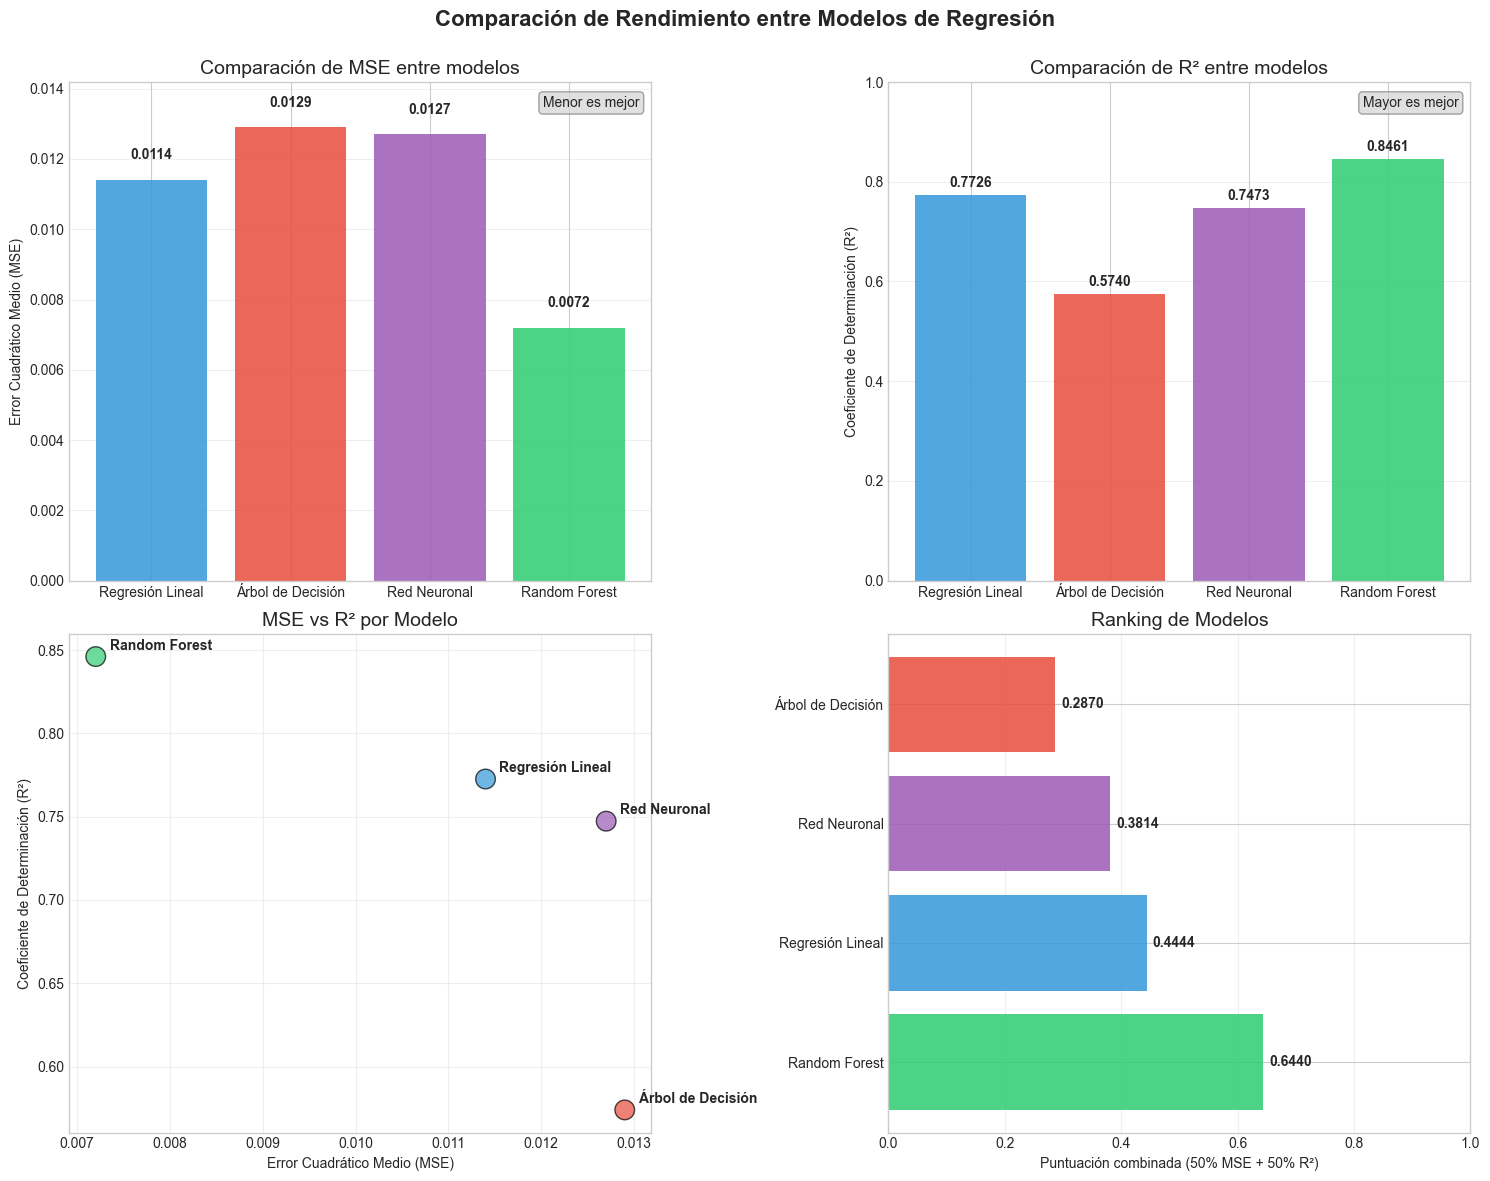

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Datos de rendimiento de los modelos con el árbol de decisión optimizado
modelos = ['Regresión Lineal', 'Árbol de Decisión', 'Red Neuronal', 'Random Forest']

# Métricas actualizadas con el árbol de decisión optimizado a profundidad max_depth=100
mse_scores = [0.0114, 0.0129, 0.0127, 0.0072]  # Nuevo valor de MSE para el árbol: 0.012
r2_scores = [0.7726, 0.5740, 0.7473, 0.8461]   # Nuevo valor de R² para el árbol: 0.574

# Configuración de visualización
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(15, 12))

# Definir paleta de colores
colors = ['#3498db', '#e74c3c', '#9b59b6', '#2ecc71']

# 1. Gráfica de barras para MSE
ax1 = plt.subplot(2, 2, 1)
bars = ax1.bar(modelos, mse_scores, color=colors, alpha=0.85)

# Añadir etiquetas de valor
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.0005,
            f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

ax1.set_title('Comparación de MSE entre modelos', fontsize=14)
ax1.set_ylabel('Error Cuadrático Medio (MSE)')
ax1.set_ylim(0, max(mse_scores) * 1.1)
ax1.grid(axis='y', alpha=0.3)

# Añadir anotación explicativa
ax1.annotate('Menor es mejor', xy=(0.98, 0.95), xycoords='axes fraction',
             fontsize=10, ha='right', bbox=dict(boxstyle="round,pad=0.3", 
             fc="lightgray", ec="gray", alpha=0.7))

# 2. Gráfica de barras para R² 
ax2 = plt.subplot(2, 2, 2)
bars = ax2.bar(modelos, r2_scores, color=colors, alpha=0.85)

# Añadir etiquetas de valor
for bar in bars:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom', fontweight='bold')

ax2.set_title('Comparación de R² entre modelos', fontsize=14)
ax2.set_ylabel('Coeficiente de Determinación (R²)')
ax2.set_ylim(0, 1.0)
ax2.grid(axis='y', alpha=0.3)

# Añadir anotación explicativa
ax2.annotate('Mayor es mejor', xy=(0.98, 0.95), xycoords='axes fraction',
             fontsize=10, ha='right', bbox=dict(boxstyle="round,pad=0.3", 
             fc="lightgray", ec="gray", alpha=0.7))

# 3. Gráfico de dispersión comparando MSE vs R² (con anotaciones)
ax3 = plt.subplot(2, 2, 3)
scatter = ax3.scatter(mse_scores, r2_scores, c=colors, s=200, alpha=0.7, edgecolor='k')

# Añadir anotaciones para cada punto
for i, modelo in enumerate(modelos):
    ax3.annotate(modelo, (mse_scores[i], r2_scores[i]), 
                xytext=(10, 5), textcoords='offset points',
                fontsize=10, fontweight='bold')

ax3.set_title('MSE vs R² por Modelo', fontsize=14)
ax3.set_xlabel('Error Cuadrático Medio (MSE)')
ax3.set_ylabel('Coeficiente de Determinación (R²)')
ax3.grid(True, alpha=0.3)

# 4. Ranking de modelos
ax4 = plt.subplot(2, 2, 4)
# Calcular puntuación combinada (50% MSE normalizado + 50% R²)
performance_score = [(1-mse/max(mse_scores))*0.5 + r2*0.5 for mse, r2 in zip(mse_scores, r2_scores)]
ranking = sorted(zip(modelos, performance_score), key=lambda x: x[1], reverse=True)
model_names = [item[0] for item in ranking]
scores = [item[1] for item in ranking]

# Asignar colores según el modelo original
model_colors = []
for name in model_names:
    idx = modelos.index(name)
    model_colors.append(colors[idx])

bars = ax4.barh(model_names, scores, color=model_colors, alpha=0.85)
for bar in bars:
    width = bar.get_width()
    ax4.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
             f'{width:.4f}', ha='left', va='center', fontweight='bold')
             
ax4.set_title('Ranking de Modelos', fontsize=14)
ax4.set_xlabel('Puntuación combinada (50% MSE + 50% R²)')
ax4.set_xlim(0, 1)
ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.92)
fig.suptitle('Comparación de Rendimiento entre Modelos de Regresión', fontsize=16, fontweight='bold')
plt.savefig('../results/plots/comparacion_modelos_actualizada.png', dpi=300, bbox_inches='tight')
plt.show()